#### Training individual faces in a directory and computing the PCA
Using How I Met You Mother (Lily, Robin & Barney)

MEAN AND PCA IMAGES


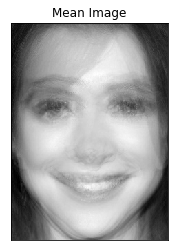

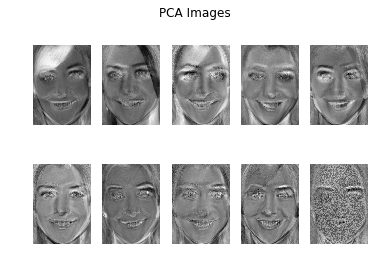

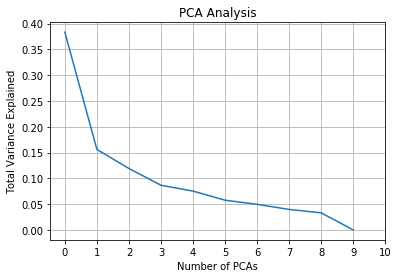

array( [3.83153673e-01 1.55946716e-01 1.19039124e-01 8.65850710e-02
 7.52579156e-02 5.75917531e-02 4.95988748e-02 3.96861777e-02
 3.31406941e-02 1.10888346e-31] )


In [3]:
import numpy as np
import cv2 
import os # os commands
from matplotlib import pyplot as plt
import os.path
import glob
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# load directories and index files (N.B.images were already resized using https://www.iloveimg.com/compress-image)
lily = "./lily-rz/"
robin = "./robin-rz"
barney = "./barney-rz/"

# --- START of function ---
def ApplyPCA(image): 
    """
    Function has one parameter, the data image. 
    Images are converted to matrices, then PCA is applied to matrices
    Returns all images in greyscale
    src for understanding pca: https://www.learnopencv.com/principal-component-analysis/
    n.b. everything is done under this function for this part because we have three 
    training image directories to go over
    """
    data,matrix,avg = [],[],[]
    files = os.listdir(image)
    
    # find all images in directory
    for img in files:
        data_path = os.path.join(image,img)
        data.append(data_path)
        data_array = np.array(data)
        #print(type(data_array)) #just to make sure its an array
    
        
    """Use PCA to find the eigenvector representation of your training data"""
    # convert images to grayscale (L)
    img_array = np.array(Image.open(data[0]).convert('L'))
    row,col = img_array.shape
    # print("Dimensions of the resized images: ",img_array.shape)
    
    # put images onto matrix
    for i in data:
        # convert to grayscale
        perImg = np.array(Image.open(i).convert('L'))
        # 1D array
        thisMat = np.array(perImg).flatten()
        matrix.append(thisMat)
    trained = np.array(matrix) #list back to array
    
#     # plot all images (to check images in directory)
#     for i in range(len(matrix)):
#         plt.subplot(2,5,i+1)
#         plt.imshow(matrix[i].reshape(row,col),'gray')
#         plt.axis('off')
#     plt.show()
    
    # Compute PCA
    mean, eigvec = cv2.PCACompute(trained, mean=None)
    avg = mean.reshape(row,col) # mean
    
    # Plot Mean and PCA Images(s)
    print("MEAN AND PCA IMAGES")
    plt.imshow(avg, cmap = "gray")
    plt.title("Mean Image"), plt.xticks([]), plt.yticks([])
    plt.show()
    
    for i in range(len(trained)):
        plt.suptitle("PCA Images")
        plt.subplot(2,5,i+1)
        plt.imshow(eigvec[i].reshape(row,col),'gray')
        plt.axis('off')
    plt.show()
    

    """finding covariance, eigenvalues and eigenvectors"""
    # help from http://www.xiaoliangbai.com/2016/09/07/applying-pca-analysis-on-images, https://etav.github.io/python/scikit_pca.html
    
    # center the data
    mean_X = trained.mean(axis=0)
    centeredM = trained - mean_X
    # find covariance, eigenvalues and eigenvectors
    cov = np.dot(centeredM, centeredM.T) # covariance 
    eigenVals, eigenVecs = np.linalg.eigh(cov) # calculate eigenvalues and eigenvectors
    reverse = eigenVals[::-1] # reverse to put in descending order
#     print("array(",reverse,")")
   
    """ Plot the variance explained by every vector in descending order"""
    covar_matrix = PCA(n_components = 20) # 20 features
    covar_matrix.fit(trained)
    variance = covar_matrix.explained_variance_ratio_ # calculate variance ratios 
    
    # Plot the variance explained in descending order
    plt.plot(variance) # same thing as plotting 'reverse' variable (decided to use 'variance' bc of accuracy)
    plt.xlabel('Number of PCAs')
    plt.ylabel('Total Variance Explained')
    plt.title('PCA Analysis')
    plt.xticks(np.arange(0, 11, 1.0))
    plt.grid(True)
    plt.show() 
    
    # array of features
    print("array(",variance,")")
# --- END of function ---

# uncomment the following three calls if you want to see their mean, pca images and plot of total variance
ApplyPCA(lily);
# ApplyPCA(robin);
# ApplyPCA(barney);